# The Basic classification - based on the tutorial from the TensorFlow [website](https://www.tensorflow.org/tutorials/keras/basic_classification#import_the_fashion_mnist_dataset)

In [66]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print("The TensorFlow version: " + str(tf.__version__))

The TensorFlow version: 1.13.1


## Dataset informations

### It contains 60,000 images to train the network and 10,000 images for further evaluation.

### Load dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### The category names

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Size of train dataset

In [5]:
train_images.shape


(60000, 28, 28)

### The number of images in dataset

In [20]:
len(train_labels)

60000

### The train dataset labels

In [19]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### Size of train dataset

In [8]:
test_images.shape

(10000, 28, 28)

### The number of labels in dataset

In [22]:
len(test_labels)


10000

## Visualisation

### The train image lookup

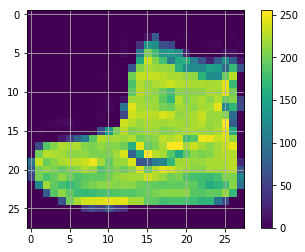

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

### The train and test dataset images scaling 

In [28]:
train_images = train_images / 255.0

test_images = test_images / 255.0

### The 

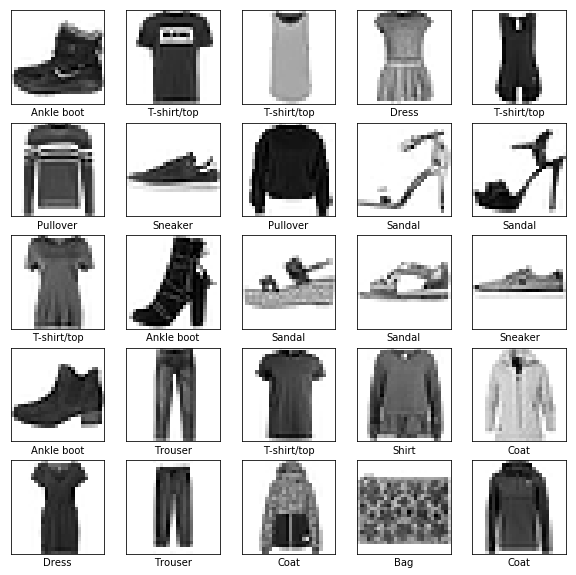

In [34]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### The model setting up

In [36]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

### The model compile

In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### The model fitting

In [38]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 17s 292us/sample - loss: 1.0769 - acc: 0.6729
Epoch 2/5
60000/60000 [==============================] - 17s 277us/sample - loss: 0.6359 - acc: 0.7708
Epoch 3/5
60000/60000 [==============================] - 17s 279us/sample - loss: 0.5620 - acc: 0.7984
Epoch 4/5
60000/60000 [==============================] - 17s 279us/sample - loss: 0.5201 - acc: 0.8152
Epoch 5/5
60000/60000 [==============================] - 17s 279us/sample - loss: 0.4918 - acc: 0.8267


### The model evaluation

In [39]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 110us/sample - loss: 0.5067 - acc: 0.8173
Test accuracy: 0.8173


### The training accuracy is about 83 % (with the loss function value of about 0.49), and testing - 82% (with the loss 0.51)

### The prediction

In [46]:
predictions = model.predict(test_images)

### The model confidence for different category of clothing

In [47]:
predictions[0]

array([3.17636886e-06, 9.02704187e-08, 2.55830473e-05, 1.92130938e-05,
       1.26735395e-05, 1.76580667e-01, 1.79862454e-05, 3.67594332e-01,
       8.84394068e-03, 4.46902394e-01], dtype=float32)

### The maximum value obtained for 'Ankle boot' category

In [48]:
np.argmax(predictions[0])


9

In [49]:
test_labels[0]


9

### The plot image function

In [44]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### 0-th image prediction

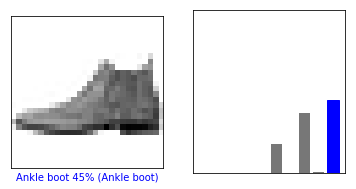

In [50]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

### 12-th image prediction

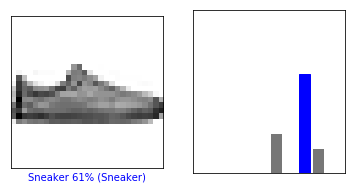

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

### The test images with their predictions: correct for blue, and red for incorrect

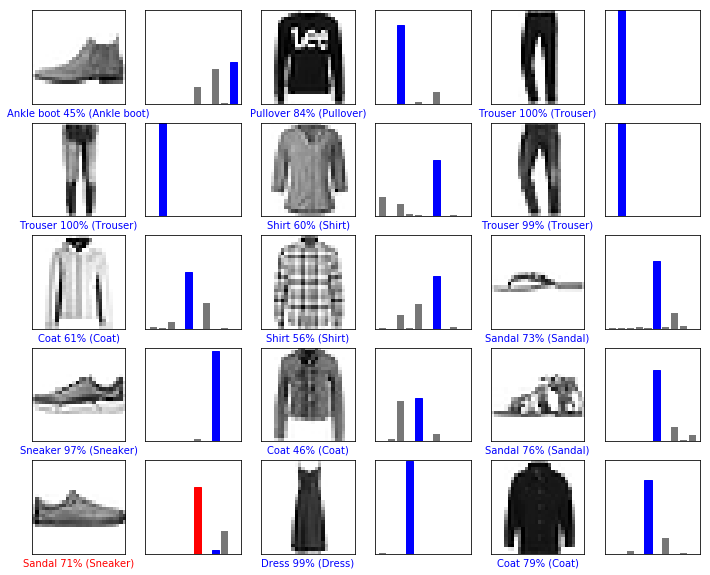

In [51]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

### The image size

In [55]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


### The batch with one image

In [56]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


### The prediction for single image

In [57]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.17637500e-06 9.02704187e-08 2.55830473e-05 1.92130774e-05
  1.26735395e-05 1.76580667e-01 1.79862618e-05 3.67594272e-01
  8.84393696e-03 4.46902394e-01]]


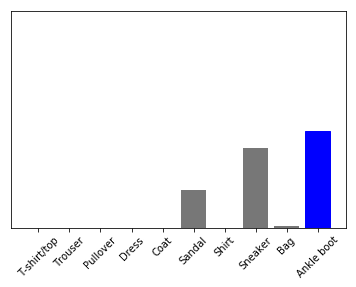

In [58]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [59]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9


# The own further testing

### Checking the influence of the epochs number on the model evaluation

In [67]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [68]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [72]:
model.fit(train_images, train_labels, epochs=40)

Epoch 1/40
60000/60000 [==============================] - 16s 270us/sample - loss: 0.3970 - acc: 0.8606
Epoch 2/40
60000/60000 [==============================] - 16s 274us/sample - loss: 0.3924 - acc: 0.8619
Epoch 3/40
60000/60000 [==============================] - 17s 277us/sample - loss: 0.3882 - acc: 0.8629
Epoch 4/40
60000/60000 [==============================] - 17s 290us/sample - loss: 0.3836 - acc: 0.8644
Epoch 5/40
60000/60000 [==============================] - 17s 280us/sample - loss: 0.3802 - acc: 0.8650
Epoch 6/40
60000/60000 [==============================] - 17s 289us/sample - loss: 0.3764 - acc: 0.8669
Epoch 7/40
60000/60000 [==============================] - 18s 305us/sample - loss: 0.3730 - acc: 0.8679
Epoch 8/40
60000/60000 [==============================] - 18s 302us/sample - loss: 0.3694 - acc: 0.8687
Epoch 9/40
60000/60000 [==============================] - 17s 280us/sample - loss: 0.3663 - acc: 0.8703
Epoch 10/40
60000/60000 [==============================] - 17s 2

### It can be seen that with increasing number of echos, accuracy is tending slowly up (from 86 % to 89 %) and higher decrease of loss function (from ~40 % to 30 %)

In [73]:
model_layers = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [76]:
model_layers.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [77]:
model_layers.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 12s 199us/sample - loss: 0.8639 - acc: 0.6893
Epoch 2/5
60000/60000 [==============================] - 12s 205us/sample - loss: 0.5627 - acc: 0.7958
Epoch 3/5
60000/60000 [==============================] - 13s 211us/sample - loss: 0.4941 - acc: 0.8229
Epoch 4/5
60000/60000 [==============================] - 12s 208us/sample - loss: 0.4544 - acc: 0.8375
Epoch 5/5
60000/60000 [==============================] - 13s 217us/sample - loss: 0.4279 - acc: 0.8462


### With additional layer, accuracy is tending slowly up (from 69 % to 84 %) and higher decrease of loss function (from ~86 % to 43 %). Higher difference can be osberved in comparison to model without this layer.

In [78]:
model_layers = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [80]:
model_layers.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [81]:
model_layers.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 13s 215us/sample - loss: 0.8878 - acc: 0.6748
Epoch 2/5
60000/60000 [==============================] - 12s 204us/sample - loss: 0.5670 - acc: 0.7954
Epoch 3/5
60000/60000 [==============================] - 13s 216us/sample - loss: 0.5091 - acc: 0.8180
Epoch 4/5
60000/60000 [==============================] - 22s 364us/sample - loss: 0.4725 - acc: 0.8322
Epoch 5/5
60000/60000 [==============================] - 28s 466us/sample - loss: 0.4472 - acc: 0.8401


### With additional layer and lower neurons number on penultimate layer, accuracy is tending slowly up (from 68 % to 84 %) and higher decrease of loss function (from ~89 % to 45 %).

In [82]:
model_layers = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [83]:
model_layers.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [84]:
model_layers.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 27s 452us/sample - loss: 0.9766 - acc: 0.6804
Epoch 2/5
60000/60000 [==============================] - 27s 454us/sample - loss: 0.5907 - acc: 0.7876
Epoch 3/5
60000/60000 [==============================] - 26s 432us/sample - loss: 0.5232 - acc: 0.8135
Epoch 4/5
60000/60000 [==============================] - 26s 433us/sample - loss: 0.4862 - acc: 0.8279
Epoch 5/5
60000/60000 [==============================] - 27s 447us/sample - loss: 0.4630 - acc: 0.8372


### With highere number of neurons (one layer), accuracy is tending slowly up (from 68 % to 84 %) and higher decrease of loss function (from ~98 % to 46 %).